# Single Pixel Imaging theory


## General formulation

Single pixel imaging enables one to reproduce a parsimonious under-sampled image of a scene using a single detector and several acquisitions. For each measurement, a specific pattern is projected onto a scene and an associated spectral coefficient is acquired.

A measurement, $ m_{k} \in \mathbb{R}_{+} $ (photon counts), of a scene, $ S \in \mathbb{R}_{M \times N}$, of height M and width N can be expressed as a function of the integration time of the detector,$\Delta t$ (s), where the power is emitted by the source, $\phi_{0} $(photons counts/s), a $p_{k} \in \mathbb{R}_{M \times N}$, and the dark current of the detector, D (photons/s), such that:

$$
m_{k}=\Delta t \cdot (\phi_{0} \cdot p_{k}^{t}\cdot S+D)
$$


Three examples of patterns are represented below:
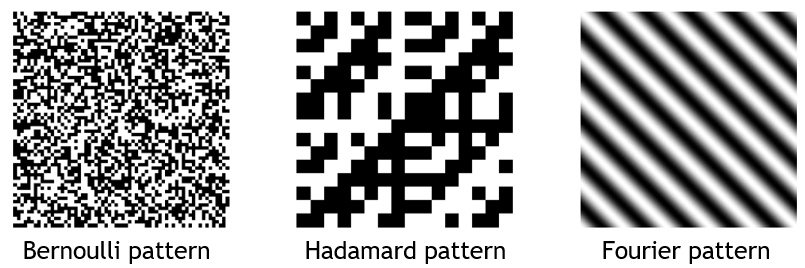


## Fourier basis

In a coordinate system (𝑥, 𝑦) a scene 𝑆 is analysable in the spatial frequency domain (𝑢, 𝑣)  using its two-dimensional Fourier transform $\hat{S}$ such that:

$$
\hat{S}(u,v)=\int_{x=-\infty}^{+\infty}\int_{y=-\infty}^{+\infty} S(x,y)\cdot e^{-2i\pi \cdot(xu+yv)}
$$


This duality in 2D space is represented below:


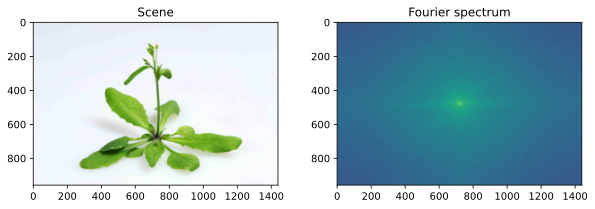

In [18]:
# Import libraries
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import matplotlib.pyplot as plt
import numpy as np

scene=plt.imread('arabidopsis.jpg')
gray_scene=np.mean(scene,2)
FT=abs(np.fft.fftshift(np.fft.fft2(gray_scene)))

plt.figure(figsize=(10,3),dpi=80)
plt.subplot(1,2,1)
plt.imshow(scene)
plt.title('Scene')
       
plt.subplot(1,2,2)
plt.imshow(np.log10(FT))
plt.title('Fourier spectrum')
plt.show()

Numerically, this relationship can be decomposed into two double sums such that:

$$
\hat{S}(u,v)=\sum_{x=0}^{M}\sum_{y=0}^{N} S(x,y)\cdot cos\Big(2\pi \cdot\big(\frac{xu}{M}+\frac{yv}{N}\big)\Big) -i\cdot \sum_{x=0}^{M}\sum_{y=0}^{N} S(x,y)\cdot sin\Big(2\pi \cdot\big(\frac{xu}{M}+\frac{yv}{N}\big)\Big)
$$

This relationship is reflected in the fact that a Fourier spectrum is reconstructable after projections of a series of real patterns (represented by the cosine) and a series of imaginary patterns (represented by the sine).

This double projection is compensated by the conjugate symmetry property of the Fourier transform. It is then only necessary to measure the values of a half spectrum in order to deduce the entirety:
![SegmentLocal](FourierSPI.gif "segment")